In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [2]:
# Data Preprocessing
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                                ])

In [4]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.75MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Visualizing a few images from the dataset
def show_images(loader):
    images, labels = next(iter(loader))
    print(images.shape)
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for i in range(5):
        img = images[i].squeeze(0).numpy()
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'Label: {labels[i].item()}')
        axes[i].axis('off')
    plt.show()

torch.Size([64, 1, 28, 28])


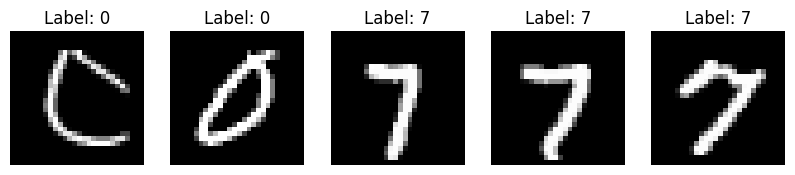

In [8]:
show_images(train_loader)

In [9]:
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [10]:
print(device)

cuda


In [11]:
resnet = models.resnet18().to(device)    # Import ResNet 18
summary(resnet, (3, 224, 224))           # Shows summery of ResNet for given shape of input

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

Here we are going to use ResNet18 as backbone architecture.

1. We will remove last 2 layers of ResNet (AdaptiveAvgPool2d and Linear)

In [12]:
resnet = models.resnet18(pretrained=True)
all = nn.Sequential(*list(resnet.children())[:-2])

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 162MB/s]


In [13]:
print(all[0:0])  # Print first 7 layers.
print("==="*20)
print(all[0:1])
print("==="*20)
print(all[1:2])
print("==="*20)
print(all[2:3])
print("==="*20)
print(all[3:4])
print("==="*20)
print(all[4:5])
print("==="*20)
print(all[5:6])
print("==="*20)
print(all[6:7])
print("==="*20)

Sequential()
Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
)
Sequential(
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Sequential(
  (2): ReLU(inplace=True)
)
Sequential(
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
)
Sequential(
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

### Without p3, p4, p5 concat

In [14]:
class FPN1(nn.Module):
  def __init__(self):
    super().__init__()

    resnet = models.resnet18(pretrained=True)
    # 3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    self.backbone = nn.Sequential(*list(resnet.children())[:-2])     # ResNet as backbone

    self.p5_1x1 = nn.Conv2d(512, 256, kernel_size=1)  # Define 1X1 conv layers to make equal number of featuremaps
    self.p4_1x1 = nn.Conv2d(256, 256, kernel_size=1)
    self.p3_1x1 = nn.Conv2d(128, 256, kernel_size=1)

    self.classifier = nn.Linear(256 * 4 * 4, 10)

  def forward(self, x):
    c3, c4, c5 = self.backbone[:6](x), self.backbone[:7](x), self.backbone(x)
    # 128, 256, 512

    # 1x1
    p5 = self.p5_1x1(c5)
    p4 = self.p4_1x1(c4) + F.interpolate(p5, scale_factor=2, mode='nearest')  #Featuremap concatination
    p3 = self.p3_1x1(c3) + F.interpolate(p4, scale_factor=2, mode='nearest')

    out = F.adaptive_avg_pool2d(p5, (4, 4))
    out = torch.flatten(out, 1)
    out = self.classifier(out)

    return out


### With p3, p4, p5 concat

In [15]:
class FPN2(nn.Module):
    def __init__(self):
        super().__init__()

        resnet = models.resnet18(pretrained=True)  # Takes 3 input channels (RGB)
        resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)  # Change input channels to 1

        self.backbone = nn.Sequential(*list(resnet.children())[:-2])  # Remove FC layer

        # Feature Pyramid Layers
        self.p5_1x1 = nn.Conv2d(512, 256, kernel_size=1)
        self.p4_1x1 = nn.Conv2d(256, 256, kernel_size=1)
        self.p3_1x1 = nn.Conv2d(128, 256, kernel_size=1)

        # 3x3 Convolutions
        self.p4_out = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.p3_out = nn.Conv2d(256, 256, kernel_size=3, padding=1)

        # Classification Head
        # * 3 is for p3 , p4, p5
        #  4 * 4 is global pooling
        self.classifier = nn.Linear(256 * 3 * 4 * 4, 10)  # 256 * 3 channels after concatenation

    def forward(self, x):
        c3, c4, c5 = self.backbone[:6](x), self.backbone[:7](x), self.backbone(x)

        # 1x1 Convolutions for channel consistency
        p5 = self.p5_1x1(c5)
        p4 = self.p4_1x1(c4) + F.interpolate(p5, size=c4.shape[2:], mode='nearest')
        p3 = self.p3_1x1(c3) + F.interpolate(p4, size=c3.shape[2:], mode='nearest')

        # Ensure `p5` is upsampled before applying 3x3 conv
        p5_up = F.interpolate(p5, size=p3.shape[2:], mode='nearest')
        p5 = self.p4_out(p5_up)  # Now it's safe to apply 3x3 conv

        p4 = self.p4_out(p4)
        p3 = self.p3_out(p3)

        # Upsample all feature maps to the same size
        p4_up = F.interpolate(p4, size=p3.shape[2:], mode='nearest')

        # Concatenate along the channel dimension
        combined_features = torch.cat([p3, p4_up, p5], dim=1)  # (Batch, 256 * 3, H, W)

        # Global Average Pooling to (4,4)
        out = F.adaptive_avg_pool2d(combined_features, (4, 4)) ## 4x4x256 --> Iw x Ih X Ch
        out = torch.flatten(out, 1)
        out = self.classifier(out)

        return out

In [16]:
# Model, Loss, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FPN1().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [19]:
summary(model, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,136
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [20]:
# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/10], Loss: 0.4403
Epoch [2/10], Loss: 0.3250
Epoch [3/10], Loss: 0.1812
Epoch [4/10], Loss: 0.6211
Epoch [5/10], Loss: 0.2860
Epoch [6/10], Loss: 0.2031
Epoch [7/10], Loss: 0.2688
Epoch [8/10], Loss: 0.2843
Epoch [9/10], Loss: 0.0572
Epoch [10/10], Loss: 0.3097


In [21]:
# Model Evaluation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 98.67%
